Importing neccessary packages

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

Importing dataset from github

In [ ]:
dataset=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**one hot encoding **

In [ ]:
df=pd.get_dummies(dataset)

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Creating X,y values

In [ ]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X),len(X_test),len(X_train)

(1338, 268, 1070)

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),


    tf.keras.layers.Dense(1,activation="relu")
])


In [ ]:
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(0.001),metrics=["mae"])

In [ ]:
hist=model.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 2669.1355 - mae: 2669.1355
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 2656.5278 - mae: 2656.5278
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 2649.2234 - mae: 2649.2234
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 2653.9971 - mae: 2653.9971
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 2656.1294 - mae: 2656.1294
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 2657.0300 - mae: 2657.0300
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 2638.5569 - mae: 2638.5569
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 2650.0881 - mae: 2650.0881
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 2646.8591 - mae: 2646.8591
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 2653.8416 - mae: 2653.8416

In [ ]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2493.0164 - mae: 2493.0164


[2493.016357421875, 2493.016357421875]

Text(0, 0.5, 'Loss')

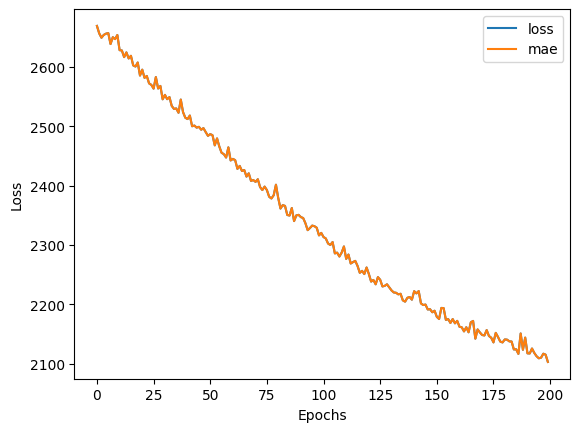

In [ ]:
pd.DataFrame(hist.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")